Generate the data with

```bash
curl -L --key $X509_USER_PROXY --cert $X509_USER_PROXY "https://cmsweb-prod.cern.ch/dbs/prod/phys03/DBSMigrate/status?migration_status=9" > status9.json
curl -L --key $X509_USER_PROXY --cert $X509_USER_PROXY "https://cmsweb-prod.cern.ch/dbs/prod/phys03/DBSMigrate/status?migration_status=2" > status2.json
```

the second query can take ~1m to complete and the output is about 300MB

In [68]:
import json
import datetime
from matplotlib import pyplot as plt


{'create_by': '/DC=ch/DC=cern/OU=computers/CN=tw/crab-prod-tw01.cern.ch', 'creation_date': 1661451867, 'last_modification_date': 1661452302, 'last_modified_by': '/DC=ch/DC=cern/OU=computers/CN=tw/crab-prod-tw01.cern.ch', 'migration_input': '/EphemeralZeroBias2/Run2022C-v1/RAW#9b48afb1-8ceb-4b83-b6f8-bfcd54491035', 'migration_request_id': 3327134, 'migration_server': 'dbs2go-phys03-m-7c46cb85d-w9mtj', 'migration_status': 9, 'migration_url': 'https://cmsweb-prod.cern.ch:8443/dbs/prod/global/DBSReader', 'retry_count': 3, 'creation_date_string': datetime.datetime(2022, 8, 25, 20, 24, 27)}


(array([19220., 19221., 19222., 19223., 19224., 19225., 19226., 19227.,
        19228., 19229., 19230.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

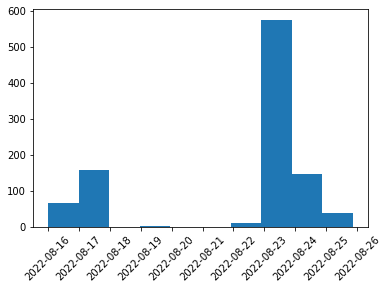

In [86]:
with open("status9.json") as f:
    s9 = json.load(f)
s9=sorted(s9, key=lambda x: x["creation_date"])


def date_string(x):
    x["creation_date_string"] = datetime.datetime.fromtimestamp(x["creation_date"])

_ = list(map(date_string , s9))

print(s9[-1])

d9 = list(map(lambda x: x["creation_date_string"], s9))
d9 = d9[-1000:]

plt.hist(d9)
plt.xticks(rotation = 45)

{'create_by': '/DC=ch/DC=cern/OU=computers/CN=tw/crab-prod-tw01.cern.ch', 'creation_date': 1661530675, 'last_modification_date': 1661530675, 'last_modified_by': '/DC=ch/DC=cern/OU=computers/CN=tw/crab-prod-tw01.cern.ch', 'migration_input': '/Wprimetotb_M3000W30_RH_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1/MINIAODSIM#178b5cd8-a070-49e1-a012-2329f508fbfb', 'migration_request_id': 3336112, 'migration_server': 'dbs2go-phys03-migration-68f77448b4-5qktj', 'migration_status': 2, 'migration_url': 'https://cmsweb-prod.cern.ch:8443/dbs/prod/global/DBSReader', 'retry_count': 0, 'creation_date_string': datetime.datetime(2022, 8, 26, 18, 17, 55)}


(array([19230.5       , 19230.54166667, 19230.58333333, 19230.625     ,
        19230.66666667, 19230.70833333, 19230.75      ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

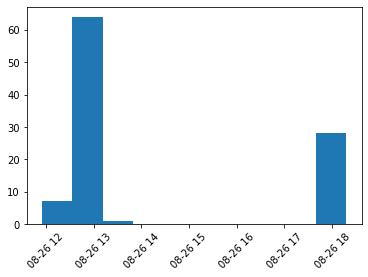

In [89]:
with open("status2.json") as f:
    s2 = json.load(f)
s2=sorted(s2, key=lambda x: x["creation_date"])

_ = list(map(date_string , s2))

print(s2[-1])

d2 = list(map(lambda x: x["creation_date_string"], s2))
d2 = d2[-100:]

plt.hist(d2)
plt.xticks(rotation = 45)

## curl

instead of loading the json, you can use directly requests, as you wish


In [58]:
import requests
import os

In [62]:
proxy = os.getenv("X509_USER_PROXY")

In [64]:
r = requests.get("https://cmsweb-prod.cern.ch/dbs/prod/phys03/DBSMigrate/status?migration_status=9", 
                 cert=(proxy, proxy), verify=False
                )


/cvmfs/cms.cern.ch/cs8_amd64_gcc10/external/py3-urllib3/1.26.6-f0f3aed6897101af71b7f32244697c43/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cmsweb-prod.cern.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [88]:
r.json()[-10:]

[{'create_by': 'service@crab-prod-tw01.cern.ch',
  'creation_date': 1658391467,
  'last_modification_date': 1658391906,
  'last_modified_by': 'service@crab-prod-tw01.cern.ch',
  'migration_input': '/WminusHToTauTau_M125_TuneCP5_13TeV-powheg-pythia8/RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2/MINIAODSIM#b96d8b3f-9911-4280-8c10-16d5ba8684a3',
  'migration_request_id': 3306962,
  'migration_server': None,
  'migration_status': 9,
  'migration_url': 'https://cmsweb-prod.cern.ch:8443/dbs/prod/global/DBSReader',
  'retry_count': 3},
 {'create_by': 'service@crab-prod-tw01.cern.ch',
  'creation_date': 1658391477,
  'last_modification_date': 1658391908,
  'last_modified_by': 'service@crab-prod-tw01.cern.ch',
  'migration_input': '/ZH_HToBB_ZToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2/MINIAODSIM#22815805-7afa-4ed9-90f6-62441f4c6e3c',
  'migration_request_id': 3306964,
  'migration_server': None,
  'migration_stat

In [85]:
# Takes too much time
# r2 = requests.get("https://cmsweb-prod.cern.ch/dbs/prod/phys03/DBSMigrate/status?migration_status=2", 
#                 cert=(proxy, proxy), verify=False
#                )